In [1]:
import graph_fourier_transform
import graph_ruggedness_de
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import networkx as nx
import os
import matplotlib.ticker as ticker
import matplotlib.colors as colors
import matplotlib.cm as cm
from scipy.stats import spearmanr
import brownian_motion
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import matplotlib as mpl
import gaussian_markov_random_field

## Ruggedness across different fitness functions
Figure 5 is focussed on how rugged different fitness functions over the same sequences. For example, it may be hypothesized that thermostability is a less rugged trait than Kcat, as thermostability is distributed over the protein sequence and can be accomodated by compensatory mutations, whereas Kcat will be restricted predominantly to the active site / functional sites and may not necessarily be accomodated by compensatory mutations. PafA is an ideal system to investigate this over, as the experimental assat reports Kcat, Km and a series of other traits over a distribution of mutations. 

## DOAx oxidase

In [26]:
df = pd.read_csv('../data_files/doax/DOAx_activity.csv')
df = df.dropna()
seq_ls = df['sequence'].tolist()
values = df['fitness'].tolist()
scaler = MinMaxScaler()
values = [val[0] for val in (scaler.fit_transform(np.array(values).reshape(-1,1)))]

G_fitness = graph_ruggedness_de.build_ohe_graph(seq_ls=seq_ls,
                                        values=values,
                                        edges=True,
                                        hamming_edges=False, 
                                        approximate=True,
                                        n=1)

# h0_prior_arr = brownian_motion.sample_prior_dist(G=G_fitness,
#                                     ruggedness_fn=graph_ruggedness_de.compute_dirichlet_energy,
#                                     local=False,
#                                     replicates=100)

# h1_prior_arr = brownian_motion.sample_rugged_prior_dist(G=G_fitness,
#                                                     ruggedness_fn=graph_ruggedness_de.compute_dirichlet_energy,
#                                                     local=False,
#                                                     replicates=100)

de_fitness = graph_ruggedness_de.compute_dirichlet_energy(G=G_fitness)

#Compute ground truth log(P)
# bf_fitness = brownian_motion.compute_marginal_likelihoods(h0_array=h0_prior_arr,
#                                                              h1_array=h1_prior_arr,
#                                                              empirical_val=de_fitness)

bf_fitness = gaussian_markov_random_field.compute_gmrf_ruggedness(G=G_fitness,
                                                                  t=5)

values = df['expression'].tolist()
G_expression = graph_ruggedness_de.build_ohe_graph(seq_ls=seq_ls,
                                        values=values,
                                        edges=True,
                                        hamming_edges=False, 
                                        approximate=True,
                                        n=1)


# h0_prior_arr = brownian_motion.sample_prior_dist(G=G_expression,
#                                     ruggedness_fn=graph_ruggedness_de.compute_dirichlet_energy,
#                                     local=False,
#                                     replicates=100)

# h1_prior_arr = brownian_motion.sample_rugged_prior_dist(G=G_expression,
#                                                     ruggedness_fn=graph_ruggedness_de.compute_dirichlet_energy,
#                                                     local=False,
#                                                     replicates=100)

de_expression = graph_ruggedness_de.compute_dirichlet_energy(G=G_expression)

#Compute ground truth log(P)
# bf_expression = brownian_motion.compute_marginal_likelihoods(h0_array=h0_prior_arr,
#                                                              h1_array=h1_prior_arr,
#                                                              empirical_val=de_expression)
bf_expression = gaussian_markov_random_field.compute_gmrf_ruggedness(G=G_expression,
                                                                     t=5)

Building approx. NN index.
Done.


Adding OHE vectors to index.: 6821it [00:02, 2728.20it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 6821it [00:00, 15317.01it/s]


Building approx. NN index.
Done.


Adding OHE vectors to index.: 6821it [00:02, 2616.92it/s]


Building approx. NN search tree(s).
Done.


Adding approximate KNN edges.: 6821it [00:00, 14965.82it/s]


In [12]:
df.columns

Index(['Unnamed: 0', 'variant', 'library', 'kcat_cMUP_s-1', 'kcat_cMUP_limit',
       'kcat_cMUP_p-value', 'KM_cMUP_uM', 'KM_cMUP_limit', 'KM_cMUP_p-value',
       'kcatOverKM_cMUP_M-1s-1', 'kcatOverKM_cMUP_limit',
       'kcatOverKM_cMUP_p-value', 'kcatOverKM_MeP_M-1s-1',
       'kcatOverKM_MeP_limit', 'kcatOverKM_MeP_p-value',
       'kcatOverKM_MecMUP_M-1s-1', 'kcatOverKM_MecMUP_limit',
       'kcatOverKM_MecMUP_p-value', 'Ki_Pi_uM', 'Ki_Pi_limit', 'Ki_Pi_p-value',
       'fa', 'fa_limit', 'fa_p-value', 'kcatOverKM_MePkchem_M-1s-1',
       'kcatOverKM_MePkchem_limit', 'kcatOverKM_MePkchem_p-value', 'FC1',
       'FC1_limit', 'FC1_p-value', 'FC2/3', 'FC2/3_limit', 'FC2/3_p-value',
       'FC4_s-1', 'FC4_limit', 'FC4_p-value', 'sequence'],
      dtype='object')

In [27]:
bf_expression

(40342.62608470634, -39953.217873463254, 389.4082112430842)

In [28]:
bf_fitness

(38894.442522258745, -39875.43557589407, -980.9930536353295)

In [29]:
de_expression

66256.29924533004

In [30]:
de_fitness

93088.8470156317

/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_11033/478359960.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = plt.cm.get_cmap('viridis', 10)
/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_11033/478359960.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


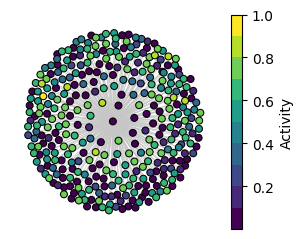

In [123]:
sampled_graph = graph_ruggedness_de.sample_graph(G=G_fitness, sample_size=0.05)[0]

values = [node[1]['value'] for node in sampled_graph.nodes(data=True)]
viridis = plt.cm.get_cmap('viridis', 10)

pos = nx.spring_layout(sampled_graph, k=0.035)

nodes_sorted_by_value = sorted(sampled_graph.nodes(data=True), key=lambda x: x[1]['value'])
node_colors = [viridis((node[1]['value'] - min(values)) / (max(values) - min(values))) for node in nodes_sorted_by_value]
nodes_sorted = [node[0] for node in nodes_sorted_by_value]

fig, ax = plt.subplots(figsize=(3.15, 2.5), constrained_layout=True)
plt.tight_layout()
nx.draw(sampled_graph, pos, nodelist=nodes_sorted, node_color=node_colors, with_labels=False, edgecolors='black', node_size=25, width=0.5, edge_color='#C6C6C6', linewidths=0.75)
sm = mpl.cm.ScalarMappable(cmap=viridis, norm=plt.Normalize(vmin=min(values), vmax=max(values)))
sm.set_array([])  # This is needed to avoid a warning


# values = [node[1]['value'] for node in G_fitness.nodes(data=True)]
# viridis = plt.cm.get_cmap('viridis', 10)

# pos = nx.spring_layout(G_fitness, k=0.0005)

# nodes_sorted_by_value = sorted(G_fitness.nodes(data=True), key=lambda x: x[1]['value'])
# node_colors = [viridis((node[1]['value'] - min(values)) / (max(values) - min(values))) for node in nodes_sorted_by_value]
# nodes_sorted = [node[0] for node in nodes_sorted_by_value]

# fig, ax = plt.subplots(figsize=(3.15, 2.5), constrained_layout=True)
# plt.tight_layout()
# nx.draw(G_fitness, pos, nodelist=nodes_sorted, node_color=node_colors, with_labels=False, edgecolors='black', node_size=25, width=0.5, edge_color='#C6C6C6', linewidths=0.75)
# sm = mpl.cm.ScalarMappable(cmap=viridis, norm=plt.Normalize(vmin=min(values), vmax=max(values)))
# sm.set_array([])  # This is needed to avoid a warning
# Add colorbar with label
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Activity')

plt.tight_layout()
plt.savefig('figures/Figure_6/fitness_graph_graph.pdf')
plt.show()

/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_11033/1011805535.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = plt.cm.get_cmap('viridis', 10)
/var/folders/dm/sqfv0msd3g50txf84szl1c4m0000gn/T/ipykernel_11033/1011805535.py:13: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


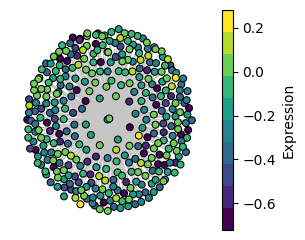

In [124]:
sampled_graph = graph_ruggedness_de.sample_graph(G=G_expression, sample_size=0.05)[0]

values = [node[1]['value'] for node in sampled_graph.nodes(data=True)]
viridis = plt.cm.get_cmap('viridis', 10)

pos = nx.spring_layout(sampled_graph, k=0.035)

nodes_sorted_by_value = sorted(sampled_graph.nodes(data=True), key=lambda x: x[1]['value'])
node_colors = [viridis((node[1]['value'] - min(values)) / (max(values) - min(values))) for node in nodes_sorted_by_value]
nodes_sorted = [node[0] for node in nodes_sorted_by_value]

fig, ax = plt.subplots(figsize=(3.15, 2.5), constrained_layout=True)
plt.tight_layout()
nx.draw(sampled_graph, pos, nodelist=nodes_sorted, node_color=node_colors, with_labels=False, edgecolors='black', node_size=25, width=0.5, edge_color='#C6C6C6', linewidths=0.75)
sm = mpl.cm.ScalarMappable(cmap=viridis, norm=plt.Normalize(vmin=min(values), vmax=max(values)))
sm.set_array([])  # This is needed to avoid a warning
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Expression')

# values = [node[1]['value'] for node in G_fitness.nodes(data=True)]
# viridis = plt.cm.get_cmap('viridis', 10)

# pos = nx.spring_layout(G_fitness, k=0.0005)

# nodes_sorted_by_value = sorted(G_fitness.nodes(data=True), key=lambda x: x[1]['value'])
# node_colors = [viridis((node[1]['value'] - min(values)) / (max(values) - min(values))) for node in nodes_sorted_by_value]
# nodes_sorted = [node[0] for node in nodes_sorted_by_value]

# fig, ax = plt.subplots(figsize=(3.15, 2.5), constrained_layout=True)
# plt.tight_layout()
# nx.draw(G_fitness, pos, nodelist=nodes_sorted, node_color=node_colors, with_labels=False, edgecolors='black', node_size=25, width=0.5, edge_color='#C6C6C6', linewidths=0.75)
# sm = mpl.cm.ScalarMappable(cmap=viridis, norm=plt.Normalize(vmin=min(values), vmax=max(values)))
# sm.set_array([])  # This is needed to avoid a warning
# Add colorbar with label
# cbar = plt.colorbar(sm, ax=ax)

# values = [node[1]['value'] for node in G_expression.nodes(data=True)]
# viridis = plt.cm.get_cmap('plasma', 10)
# #pos = nx.spring_layout(G_expression, k=0.009)


# nodes_sorted_by_value = sorted(G_expression.nodes(data=True), key=lambda x: x[1]['value'])
# node_colors = [viridis((node[1]['value'] - min(values)) / (max(values) - min(values))) for node in nodes_sorted_by_value]
# nodes_sorted = [node[0] for node in nodes_sorted_by_value]

# fig, ax = plt.subplots(figsize=(3.15, 2.5), constrained_layout=True)
# plt.tight_layout()
# nx.draw(G_fitness, pos, nodelist=nodes_sorted, node_color=node_colors, with_labels=False, edgecolors='black', node_size=25, width=0.5, edge_color='#C6C6C6', linewidths=0.75)
# sm = mpl.cm.ScalarMappable(cmap=viridis, norm=plt.Normalize(vmin=min(values), vmax=max(values)))
# sm.set_array([])  # This is needed to avoid a warning
# # Add colorbar with label
# cbar = plt.colorbar(sm, ax=ax)
# cbar.set_label('Expression')

plt.tight_layout()
plt.savefig('figures/Figure_6/expression_graph.pdf')
plt.show()

In [3]:
bf_expression

(-87051.73124494482, -86662.32303370173, 389.4082112430842)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (2,) and arg 1 with shape (2, 3).

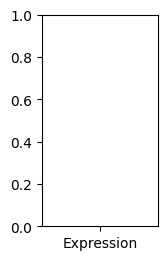

In [6]:
fig = plt.figure(figsize=(1.5, 2.75))
plt.bar(x=['Expression', 'Activity'], height=[bf_expression, bf_fitness], color='grey', edgecolor='black')
plt.ylabel('log(BF)')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig('figures/Figure_6/expression_fitness_logbf_bar.pdf')

## DOAx stability and fitness solution space sizes

In [58]:
data = pd.read_csv('../data_files/doax/DOAx_activity.csv')
wt = data[data['fitness'] == 0]

improved_expression = data[data['expression'] > 0.1]
improved_fitness = data[data['fitness'] > 0.1]

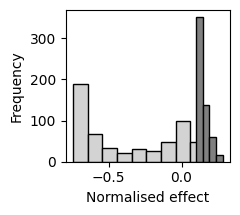

In [99]:
fig = plt.figure(figsize=(2.5, 2.25))
plt.hist(improved_expression['fitness'], color='lightgrey', edgecolor='black')
plt.hist(improved_expression['expression'], color='grey', edgecolor='black', bins=4)
plt.xlabel('Normalised effect')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('figures/Figure_6/improved_expression_hist.pdf')

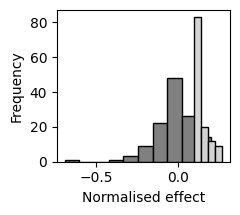

In [98]:
# plt.hist(improved_fitness['expression'], color='#3B496C', edgecolor='black')
# plt.hist(improved_fitness['fitness'], color='#E0CA4F', edgecolor='black')

fig = plt.figure(figsize=(2.5, 2.25))
plt.hist(improved_fitness['expression'], color='grey', edgecolor='black')
plt.hist(improved_fitness['fitness'], color='lightgrey', edgecolor='black', bins=4)
plt.xlabel('Normalised effect')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('figures/Figure_6/improved_fitness_hist.pdf')